In [1]:
# Linear Regression
#Gradient Descent

In [152]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes

In [153]:
# load the dataset
X, y = load_diabetes(return_X_y=True)
diabetes = load_diabetes()
df_In= pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_In.insert(10, "y", y, allow_duplicates = False)
pd.DataFrame(df_In)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [154]:
# looking for zero values in the X
print((df_In[:]==0).sum())

# Checking if there is any non float value in the X
a=0
for i in X:
    for j in i:
        if not isinstance(j, float):
            a+=1
print("Number of the Values that their format is not a number is:",a)

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
y      0
dtype: int64
Number of the Values that their format is not a number is: 0


In [155]:
# looking for zero values in the y
print((df_Out[:]==0).sum())

# Checking if there is any non float value in the X
for i in y:
    if not isinstance(i, float):
        a+=1
print("Number of the Values that are not numbers is:",a)

0    0
dtype: int64
Number of the Values that are not numbers is: 0


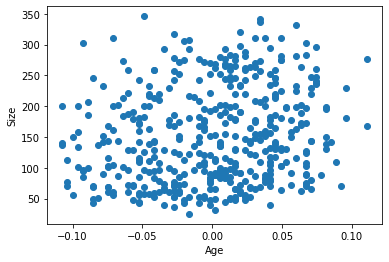

In [156]:
# Let's look at age plot for example
plt.scatter(df_In["age"],y)
plt.xlabel("Age")
plt.ylabel("Size")
plt.show()

In [157]:
def compute_cost(x, y, w, b): 
   
    m = x.shape[0] 
    
    total_cost = 0
    cost=0
    
    for i in range (m):
        f_wb_i= np.dot(w , x[i]) + b
        cost =cost+ (f_wb_i - y[i])**2
        
    total_cost = 1 / (2 * m) * cost
     

    return total_cost

In [158]:
w_in=np.zeros((1,10))               #Initial values for w
b_in=0                              # Initial value for b
total_cost= compute_cost(X, y, w_in, b_in)
print(f"Cost at w,b=0 is: {total_cost}")

Cost at w,b=0 is: [14537.24095023]


In [159]:
y=y.reshape(442,1)
def compute_gradient(x, y, w, b): 

    m,n = x.shape           
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(w, x[i]) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [160]:
tmp_dj_db, tmp_dj_dw = compute_gradient(X, y, w_in, b_in)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-152.13348416]
dj_dw at initial w,b: 
 [-0.688197   -0.15772705 -2.14804358 -1.61705489 -0.77659378 -0.6375217
  1.44603004 -1.57665844 -2.07270899 -1.40095661]


In [165]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
       
    
    J_history = []
    w = copy.deepcopy(w_in)  
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(x, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
         # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
        
    return w, b, J_history #return final w,b and J history 

In [166]:
# some gradient descent settings
iterations = 5000
alpha =2

 
'''
I ran gradient descent twice and I passed the new w and b to the gradient descent function again. In the end, it gave me these values 
with Cost= 1439. So I'm going to choose these values for initial w and b. Now I'm going to run gradient descent.
'''
w_in=np.array([-6.62575313, -236.50655697,  528.90127063,  322.06859081, -100.76918907,
   -82.22331178, -196.09877691,  109.28834698,  487.70610767,   70.14954179])
b_in=152.13348416


# run gradient descent
w_final, b_final, J_hist = gradient_descent(X, y, w_in, b_in,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final},{w_final} ")
# m,_ = x.shape
# for i in range(m):
#     print(f"prediction: {np.dot(w_final, x[i]) + b_final}, target value: {y[i]}")

predictions=np.dot(X, w_final) + b_final
data= pd.DataFrame(predictions)
data.insert(1, "actual values (y)", y, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

Iteration 0: Cost [1439.1318699]   
Iteration 500: Cost [1438.76261823]   
Iteration 1000: Cost [1438.4124525]   
Iteration 1500: Cost [1438.07902354]   
Iteration 2000: Cost [1437.76065817]   
Iteration 2500: Cost [1437.45606783]   
Iteration 3000: Cost [1437.16422804]   
Iteration 3500: Cost [1436.88430297]   
Iteration 4000: Cost [1436.61559343]   
Iteration 4500: Cost [1436.35750035]   
b,w found by gradient descent: [152.13348416],[  -7.35019729 -236.88214884  526.66820344  321.91676538 -221.70367049
   22.30553573 -152.01064994  107.7182714   537.78626876   69.65665595] 


,Predicted values,actual values (y)
0,204.205697,151.0
1,69.846862,75.0
2,174.805546,141.0
3,164.033547,206.0
4,128.054383,135.0
...,...,...
437,191.971581,178.0
438,102.255050,104.0
439,123.453885,132.0
440,210.090049,220.0


In [167]:
# Scikit-learn

#Import packages


from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor






In [177]:


# SVR fit and prediction


mod = SVR()
y=y.reshape(442)
mod.fit(X,y)
pred= mod.predict(X)

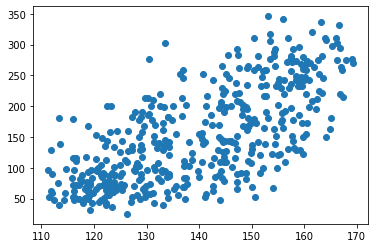

In [178]:
plt.scatter(pred , y)
plt.show()

In [179]:
# Predicted values
data= pd.DataFrame(pred)
data.insert(1, "actual values (y)", y, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

,Predicted values,actual values (y)
0,154.552965,151.0
1,113.217897,75.0
2,146.272437,141.0
3,144.159659,206.0
4,127.322121,135.0
...,...,...
437,157.786608,178.0
438,137.395883,104.0
439,131.914820,132.0
440,156.135769,220.0


In [180]:
#Cost of SVR
Cost=0
for i in range(0,441):
    Cost+= (pred[i]-y[i])**2
print(Cost/(2*442))

2344.538022728446


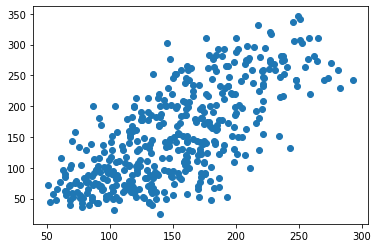

In [181]:


# SGDR fit and predict


sgdr = SGDRegressor(max_iter=20000)
sgdr.fit(X, y)
pred= sgdr.predict(X)

plt.scatter(pred , y)
plt.show()

In [182]:
# Predicted values
data= pd.DataFrame(pred)
data.insert(1, "actual values (y)", y, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

,Predicted values,actual values (y)
0,197.331957,151.0
1,72.612546,75.0
2,172.014307,141.0
3,159.590448,206.0
4,127.907606,135.0
...,...,...
437,188.970120,178.0
438,115.530298,104.0
439,131.187830,132.0
440,199.339740,220.0


In [183]:
# Cost of SGDR
Cost=0
for i in range(0,441):
    Cost+= (pred[i]-y[i])**2
print(Cost/(2*442))

1458.9929907298122


In [184]:
# b and W
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameter:    w: {w_norm}, b:{b_norm}")

model parameter:    w: [  12.01786785 -178.30342627  464.05132756  290.79098706  -33.47309076
  -94.89974808 -202.85142478  129.63020849  387.23715056  122.96156369], b:[152.12851546]


In [185]:



# Tensorflow


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu

In [186]:
#Tile our data to increase the training set size and reduce the number of training epochs.
Xt = np.tile(X,(1000,1))
Yt= np.tile(y,(1000))   
print(Xt.shape, Yt.shape)

(442000, 10) (442000,)


In [187]:
model = Sequential(
    [
        tf.keras.Input(shape=(10,)),
        Dense(50, activation='relu', name = 'layer1'),
        Dense(30, activation='relu', name = 'layer2'),
        Dense(20, activation='relu', name = 'layer3'),
        Dense(1, activation='linear', name = 'layer4'),
     ]
)

In [188]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 50)                550       
                                                                 
 layer2 (Dense)              (None, 30)                1530      
                                                                 
 layer3 (Dense)              (None, 20)                620       
                                                                 
 layer4 (Dense)              (None, 1)                 21        
                                                                 
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,            
    epochs=4,
)

Epoch 1/4
13813/13813 [==============================] - 43s 3ms/step - loss: 1915.7695
Epoch 2/4
13813/13813 [==============================] - 41s 3ms/step - loss: 184.0687
Epoch 3/4
13813/13813 [==============================] - 42s 3ms/step - loss: 53.0284
Epoch 4/4
13813/13813 [==============================] - 43s 3ms/step - loss: 38.5859


In [190]:
predictions = model.predict(X)
data= pd.DataFrame(predictions)
data.insert(1, "actual values (y)", y, allow_duplicates = False)
data = data.rename(columns={0: 'Predicted values'})
pd.DataFrame(data)

14/14 [==============================] - 0s 2ms/step


,Predicted values,actual values (y)
0,158.585281,151.0
1,75.314392,75.0
2,144.380478,141.0
3,207.731201,206.0
4,136.680740,135.0
...,...,...
437,177.366043,178.0
438,105.476028,104.0
439,130.059631,132.0
440,226.259583,220.0
